In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/olympiad_data.csv')

df

,Муниципалитет,Этап олимпиады,Год проведения,Количество участников,Количество призёров,Процент призёров,Средний балл по этапу
0,Менделеевск,Муниципальный,2024.0,127,26,20.47,80.83
1,Лениногорск,Муниципальный,2015.0,22,10,45.45,82.28
2,Апастово,Заключительный,2018.0,127,17,13.39,ошибка
3,Азнакаево,Региональный,2015.0,158,37,23.42,62.94
4,Чистополь,Заключительный,2023.0,36,8,22.22,65.16
...,...,...,...,...,...,...,...
1995,Кукмор,Муниципальный,2021.0,32,16,50.0,NaN
1996,Агрыз,Региональный,2021.0,168,44,26.19,93.64
1997,Буинск,Региональный,2020.0,148,NaN,ошибка,97.23
1998,Заинск,Муниципальный,2023.0,73,26,35.62,NaN


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Муниципалитет          2000 non-null   object 
 1   Этап олимпиады         2000 non-null   object 
 2   Год проведения         2000 non-null   float64
 3   Количество участников  1799 non-null   object 
 4   Количество призёров    1830 non-null   object 
 5   Процент призёров       1611 non-null   object 
 6   Средний балл по этапу  1882 non-null   object 
dtypes: float64(1), object(6)
memory usage: 109.5+ KB


In [160]:
df.isnull().sum().sort_values(ascending=False)

Процент призёров         389
Количество участников    201
Количество призёров      170
Средний балл по этапу    118
Год проведения             0
Муниципалитет              0
Этап олимпиады             0
dtype: int64

In [161]:
print(df['Муниципалитет'].eq('неизвестно').sum())
print(df['Этап олимпиады'].eq('неизвестно').sum())
print(df['Год проведения'].eq('неизвестно').sum())

0
0
0


In [162]:
df['Количество участников'] = pd.to_numeric(df['Количество участников'], errors='coerce')
df['Количество призёров'] = pd.to_numeric(df['Количество призёров'], errors='coerce')
df['Процент призёров'] = pd.to_numeric(df['Процент призёров'], errors='coerce')
df['Средний балл по этапу'] = pd.to_numeric(df['Средний балл по этапу'], errors='coerce')

df['Год проведения'] = df['Год проведения'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Муниципалитет          2000 non-null   object 
 1   Этап олимпиады         2000 non-null   object 
 2   Год проведения         2000 non-null   int64  
 3   Количество участников  1740 non-null   float64
 4   Количество призёров    1783 non-null   float64
 5   Процент призёров       1213 non-null   float64
 6   Средний балл по этапу  1837 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 109.5+ KB


In [163]:
df.describe()

,Год проведения,Количество участников,Количество призёров,Процент призёров,Средний балл по этапу
count,2000.000000,1740.000000,1783.000000,1213.000000,1837.00000
mean,2019.497500,102.011494,22.006169,25.216340,68.04681
std,2.861658,56.670196,22.172734,14.047029,20.80466
min,2015.000000,10.000000,0.000000,0.590000,-1.00000
25%,2017.000000,52.000000,4.000000,13.390000,53.39000
50%,2020.000000,102.000000,15.000000,25.000000,69.06000
75%,2022.000000,151.000000,34.000000,37.110000,84.48000
max,2024.000000,200.000000,97.000000,50.000000,99.98000


In [164]:
df

,Муниципалитет,Этап олимпиады,Год проведения,Количество участников,Количество призёров,Процент призёров,Средний балл по этапу
0,Менделеевск,Муниципальный,2024,127.0,26.0,20.47,80.83
1,Лениногорск,Муниципальный,2015,22.0,10.0,45.45,82.28
2,Апастово,Заключительный,2018,127.0,17.0,13.39,NaN
3,Азнакаево,Региональный,2015,158.0,37.0,23.42,62.94
4,Чистополь,Заключительный,2023,36.0,8.0,22.22,65.16
...,...,...,...,...,...,...,...
1995,Кукмор,Муниципальный,2021,32.0,16.0,50.00,NaN
1996,Агрыз,Региональный,2021,168.0,44.0,26.19,93.64
1997,Буинск,Региональный,2020,148.0,NaN,NaN,97.23
1998,Заинск,Муниципальный,2023,73.0,26.0,35.62,NaN


np.int64(260)

In [166]:
df

,Муниципалитет,Этап олимпиады,Год проведения,Количество участников,Количество призёров,Процент призёров,Средний балл по этапу
0,Менделеевск,Муниципальный,2024,127.0,26.0,20.47,80.83
1,Лениногорск,Муниципальный,2015,22.0,10.0,45.45,82.28
2,Апастово,Заключительный,2018,127.0,17.0,13.39,NaN
3,Азнакаево,Региональный,2015,158.0,37.0,23.42,62.94
4,Чистополь,Заключительный,2023,36.0,8.0,22.22,65.16
...,...,...,...,...,...,...,...
1995,Кукмор,Муниципальный,2021,32.0,16.0,50.00,NaN
1996,Агрыз,Региональный,2021,168.0,44.0,26.19,93.64
1997,Буинск,Региональный,2020,148.0,NaN,NaN,97.23
1998,Заинск,Муниципальный,2023,73.0,26.0,35.62,NaN


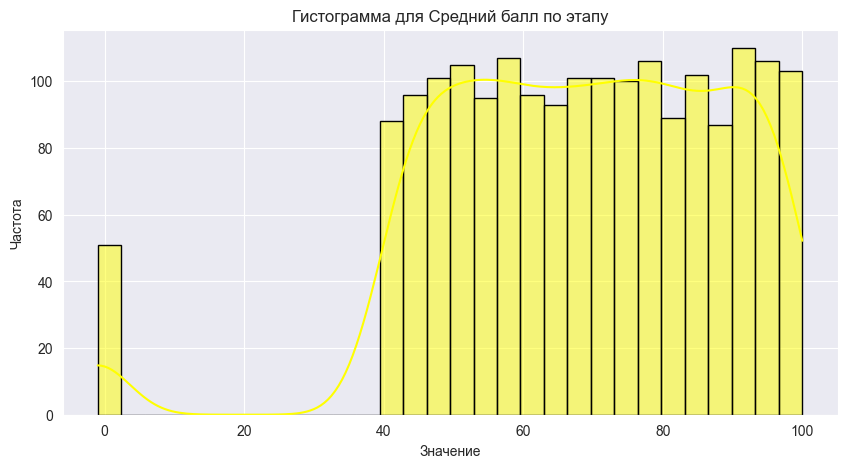

In [167]:
column_name1 = 'Средний балл по этапу'

plt.figure(figsize=(10, 5))
sns.histplot(df[column_name1], bins=30, kde=True, color='yellow', edgecolor='black')
plt.title(f'Гистограмма для {column_name1}')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()